1. Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb


2. Load the Dataset

In [4]:
# Load the dataset
file_path ='/content/ParisHousing.csv'
housing_data = pd.read_csv(file_path)

3. Data Preprocessing

In [5]:
# Check for missing values
missing_values = housing_data.isnull().sum()

# If there are missing values, handle them (e.g., fill with mean/median or drop)
housing_data = housing_data.dropna()

# Convert categorical variables (if any) to numerical values (e.g., using one-hot encoding)
# For this dataset, there are no categorical variables, so this step is not needed.


4. Exploratory Data Analysis (EDA)

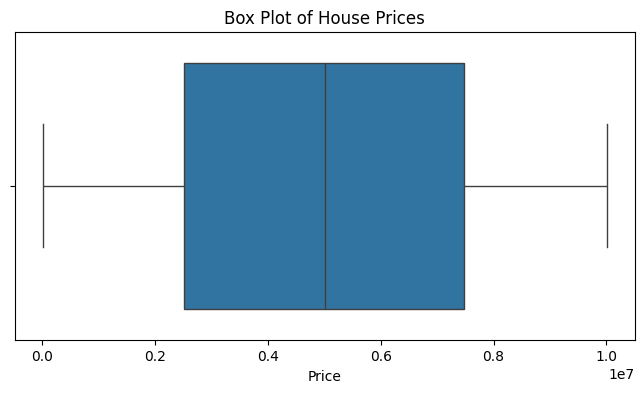

In [7]:
#1. Distribution of the Target Variable (Price) Using a Box Plot
# Box plot for the distribution of house prices
plt.figure(figsize=(8, 4))
sns.boxplot(x=housing_data['price'])
plt.title('Box Plot of House Prices')
plt.xlabel('Price')
plt.show()


Box Plot is efficient for detecting outliers and understanding the spread of the data.

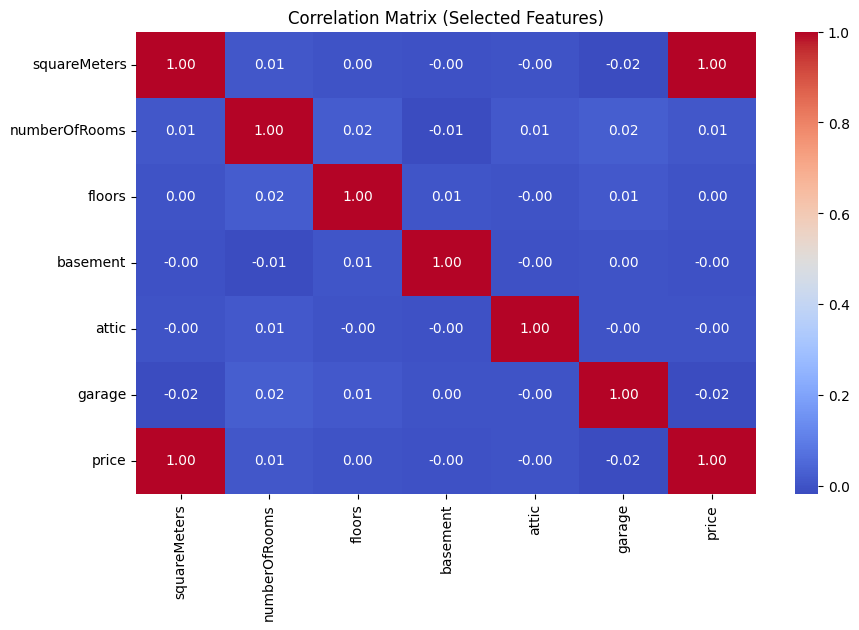

In [8]:
#2. Correlation Heatmap (Using a Smaller Subset of Data)
# Correlation heatmap for a smaller subset of columns
plt.figure(figsize=(10, 6))
selected_columns = ['squareMeters', 'numberOfRooms', 'floors', 'basement', 'attic', 'garage', 'price']
corr_matrix = housing_data[selected_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Selected Features)')
plt.show()



Selective Correlation Heatmap limits the number of features displayed, reducing rendering time.

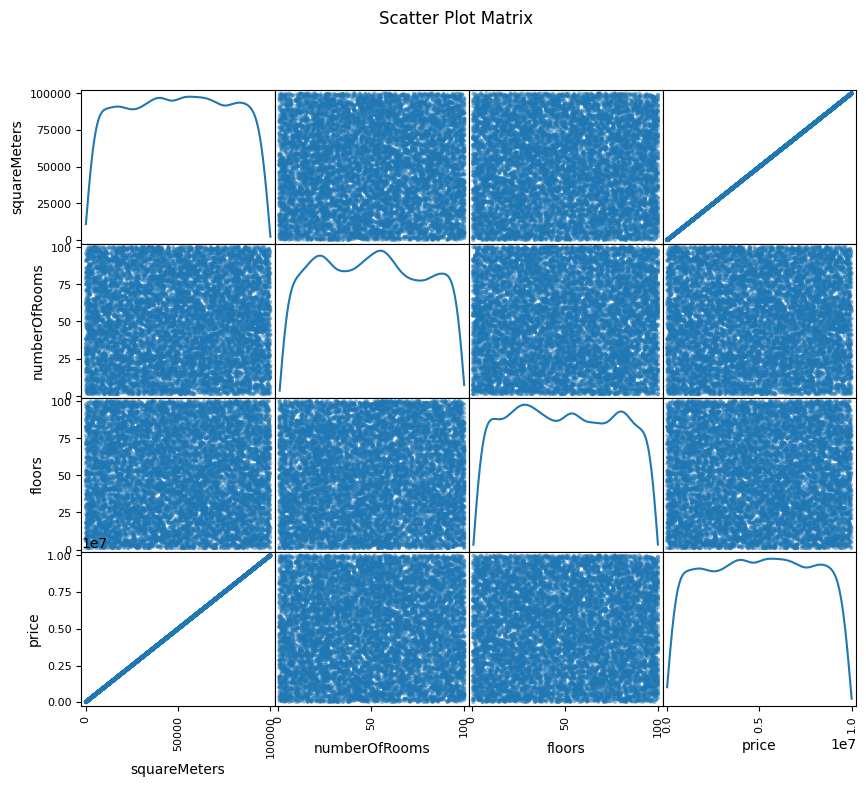

In [9]:
#3. Scatter Plot Matrix (Faster Alternative to Pairplot)
# Scatter plot matrix (faster alternative to pairplot)
from pandas.plotting import scatter_matrix

# Select a subset of features for quick visualization
subset_data = housing_data[['squareMeters', 'numberOfRooms', 'floors', 'price']]
scatter_matrix(subset_data, figsize=(10, 8), diagonal='kde')
plt.suptitle('Scatter Plot Matrix')
plt.show()


Scatter Plot Matrix is a quicker alternative to pairplot, useful for visualizing relationships between a few selected features.

In [10]:
#4. Summary Statistics
# Display summary statistics
summary_stats = housing_data.describe()
print(summary_stats)


       squareMeters  numberOfRooms       hasYard       hasPool        floors  \
count   10000.00000   10000.000000  10000.000000  10000.000000  10000.000000   
mean    49870.13120      50.358400      0.508700      0.496800     50.276300   
std     28774.37535      28.816696      0.499949      0.500015     28.889171   
min        89.00000       1.000000      0.000000      0.000000      1.000000   
25%     25098.50000      25.000000      0.000000      0.000000     25.000000   
50%     50105.50000      50.000000      1.000000      0.000000     50.000000   
75%     74609.75000      75.000000      1.000000      1.000000     76.000000   
max     99999.00000     100.000000      1.000000      1.000000    100.000000   

           cityCode  cityPartRange  numPrevOwners         made    isNewBuilt  \
count  10000.000000   10000.000000   10000.000000  10000.00000  10000.000000   
mean   50225.486100       5.510100       5.521700   2005.48850      0.499100   
std    29006.675799       2.872024     

Summary Statistics provides a quick overview of the distribution, including mean, median, and standard deviation, without any graphical rendering.

5. Feature Engineering

In [11]:
# Separate features and target variable
X = housing_data.drop('price', axis=1)
y = housing_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


6. Model Training with XGBoost

In [12]:
# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)


7. Model Evaluation

In [13]:
# Calculate and print RMSE and R-squared
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")


Root Mean Squared Error (RMSE): 12256.885010561948
R-squared: 0.9999828478805116


The XGBoost model has a very low RMSE of $12,257, indicating minimal average prediction error. Its R-squared value of 0.99998 shows that the model explains almost all the variability in house prices, reflecting excellent performance.


8. Feature Importance (Optional)


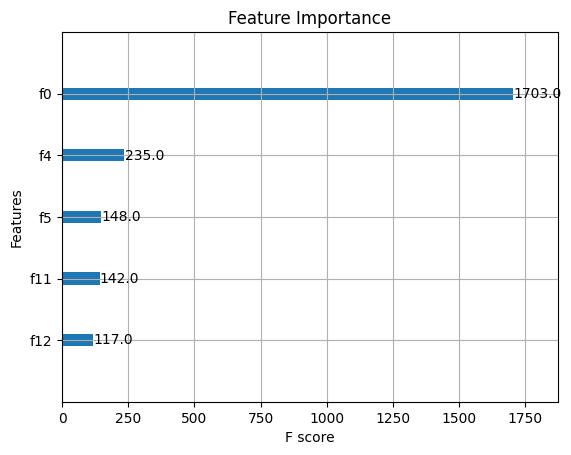

In [15]:
# Plot feature importance
xgb.plot_importance(xgb_model, max_num_features=5)
plt.title('Feature Importance')
plt.show()


This bar chart shows the importance of different features in your Random Forest model's predictions.

f0 is the most important feature by a large margin, meaning it has the biggest impact on predicting house prices.
The other features (f4, f5, f11, f12) have some influence but are much less important compared to f0.
Understanding which features are most important helps in interpreting the model and possibly improving it by focusing on key features.

Random Forest Model

In [16]:
#1. Import Necessary Libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [17]:
#2. Initialize, Train, and Predict
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

In [18]:
#3. Evaluate the Model
# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print(f"MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, R²: {r2_rf}")


MAE: 3183.8239768999247, MSE: 16010640.987120755, RMSE: 4001.329902310075, R²: 0.9999981720416787


#Summary of Random Forest Regressor Model:
Your Random Forest model predicts house prices with high accuracy. The average error is about €3,184, and the model explains nearly 100% of the variance in prices, meaning it's extremely reliable for this task.